In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
# 輸入特徵
X = iris.data
# 輸出特徵
y = iris.target

In [3]:
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])

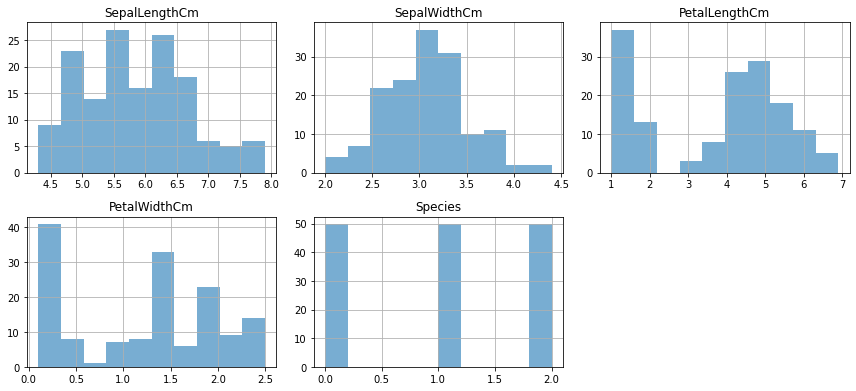

In [4]:
#直方圖 histograms
df_data.hist(alpha=0.6,layout=(3,3), figsize=(12, 8), bins=10) 
plt.tight_layout()
plt.show()

array([[<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='Species', yl

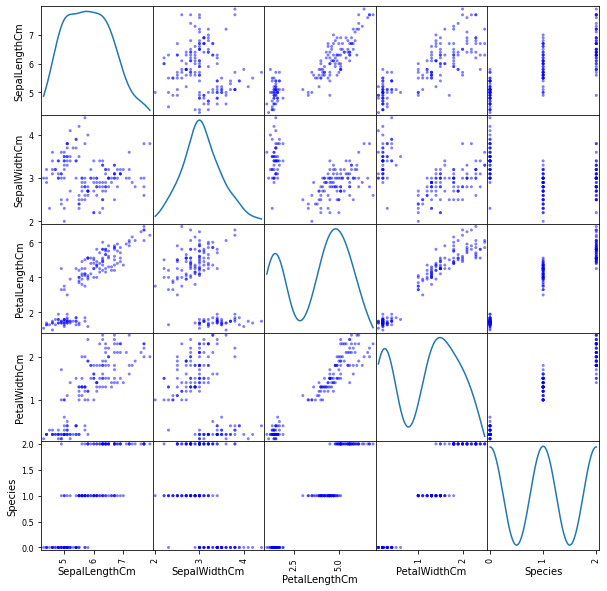

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix( df_data,figsize=(10, 10),color='b',diagonal='kde')

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

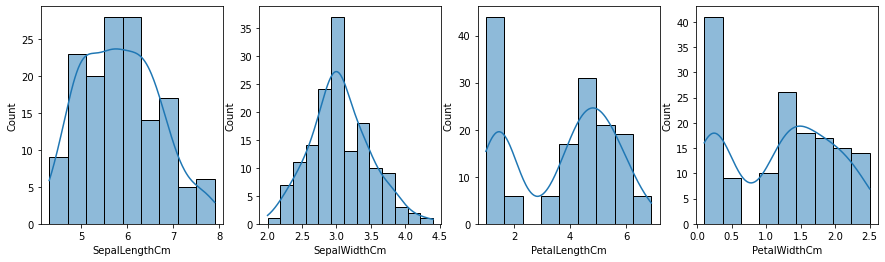

In [6]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.histplot(df_data["SepalLengthCm"][:],ax=axes[0], kde=True)
sns.histplot(df_data["SepalWidthCm"][:],ax=axes[1], kde=True)
sns.histplot(df_data["PetalLengthCm"][:],ax=axes[2], kde=True)
sns.histplot(df_data["PetalWidthCm"][:],ax=axes[3], kde=True)

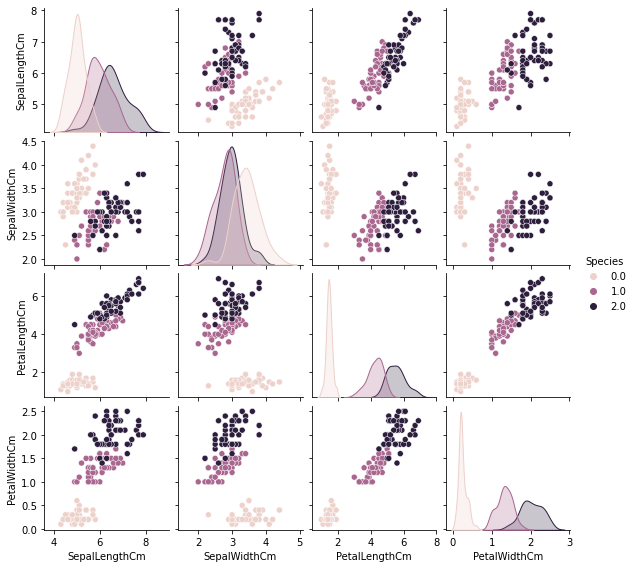

In [7]:
sns.pairplot(df_data, hue="Species", height=2, diag_kind="kde")

<AxesSubplot:>

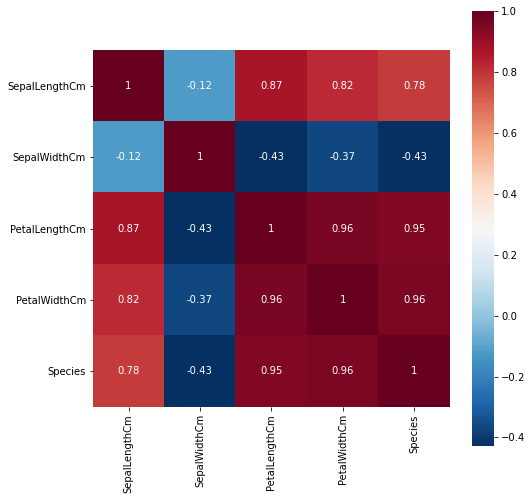

In [8]:
# correlation 計算
corr = df_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r")

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


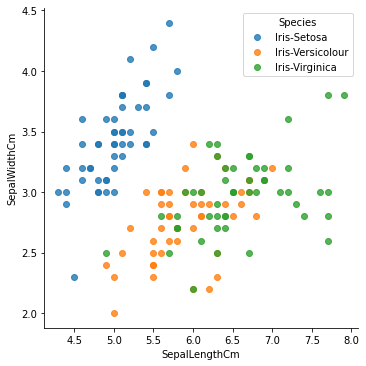

In [9]:
sns.lmplot("SepalLengthCm", "SepalWidthCm", hue='Species', data=df_data, fit_reg=False, legend=False)
plt.legend(title='Species', loc='upper right', labels=['Iris-Setosa', 'Iris-Versicolour', 'Iris-Virginica'])

In [10]:
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species']
# checked missing data
print("checked missing data(NAN mount):",len(np.where(np.isnan(X))[0]))

checked missing data(NAN mount): 0


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


In [12]:
# Standardization平均&變異數標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# scaled之後的資料零均值，單位方差  
print('資料集 X 的平均值 : ', X_train.mean(axis=0))
print('資料集 X 的標準差 : ', X_train.std(axis=0))

print('\nStandardScaler 縮放過後訓練集的平均值 : ', X_train_scaled.mean(axis=0))
print('StandardScaler 縮放過後訓練集的標準差 : ', X_train_scaled.std(axis=0))

print('\nStandardScaler 縮放過後測試集的平均值 : ', X_test_scaled.mean(axis=0))
print('StandardScaler 縮放過後測試集的標準差 : ', X_test_scaled.std(axis=0))



資料集 X 的平均值 :  [5.87333333 3.0552381  3.7847619  1.20571429]
資料集 X 的標準差 :  [0.85882164 0.45502087 1.77553646 0.77383751]

StandardScaler 縮放過後訓練集的平均值 :  [ 2.38327876e-15 -1.12145742e-15 -1.37456184e-16 -6.97854473e-17]
StandardScaler 縮放過後訓練集的標準差 :  [1. 1. 1. 1.]

StandardScaler 縮放過後測試集的平均值 :  [-0.11643861  0.01534903 -0.05024191 -0.02748619]
StandardScaler 縮放過後測試集的標準差 :  [0.85754489 0.83947065 0.96847064 0.9374037 ]


<AxesSubplot:ylabel='Count'>

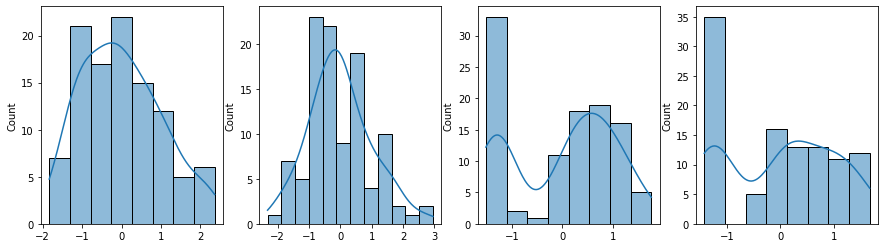

In [14]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.histplot(X_train_scaled[:,0],ax=axes[0], kde=True)
sns.histplot(X_train_scaled[:,1],ax=axes[1], kde=True)
sns.histplot(X_train_scaled[:,2],ax=axes[2], kde=True)
sns.histplot(X_train_scaled[:,3],ax=axes[3], kde=True)

In [15]:
# 將縮放的資料還原
# X_test_inverse = scaler.inverse_transform(X_test_scaled)

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# scaled 之後的資料最小值、最大值  
print('資料集 X 的最小值 : ', X_train.min(axis=0))
print('資料集 X 的最大值 : ', X_train.max(axis=0))

print('\nStandardScaler 縮放過後訓練集的最小值 : ', X_train_scaled.min(axis=0))
print('StandardScaler 縮放過後訓練集的最大值 : ', X_train_scaled.max(axis=0))

print('\nStandardScaler 縮放過後測試集的最小值 : ', X_test_scaled.min(axis=0))
print('StandardScaler 縮放過後測試集的最大值 : ', X_test_scaled.max(axis=0))

資料集 X 的最小值 :  [4.3 2.  1.1 0.1]
資料集 X 的最大值 :  [7.9 4.4 6.9 2.5]

StandardScaler 縮放過後訓練集的最小值 :  [0. 0. 0. 0.]
StandardScaler 縮放過後訓練集的最大值 :  [1. 1. 1. 1.]

StandardScaler 縮放過後測試集的最小值 :  [ 0.02777778  0.125      -0.01724138  0.04166667]
StandardScaler 縮放過後測試集的最大值 :  [0.83333333 0.83333333 0.89655172 0.95833333]


<AxesSubplot:ylabel='Count'>

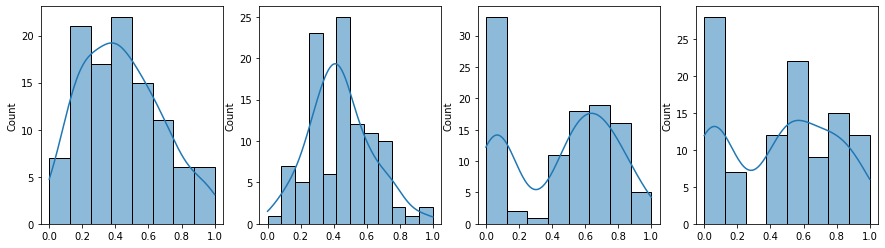

In [17]:
fig, axes = plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15, 4)
sns.histplot(X_train_scaled[:,0],ax=axes[0], kde=True)
sns.histplot(X_train_scaled[:,1],ax=axes[1], kde=True)
sns.histplot(X_train_scaled[:,2],ax=axes[2], kde=True)
sns.histplot(X_train_scaled[:,3],ax=axes[3], kde=True)

In [18]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X)
X_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)